## Análise do Impacto do Alto Fluxo Marítimo na  Temperatura Terrestre 

### Contextualização

### Objetivo

¹https://www.carbonbrief.org/analysis-how-low-sulphur-shipping-rules-are-affecting-global-warming/

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import calendar

In [3]:
# Passando o caminho do arquivo .csv e importando-o como um DataFrame
file_path = './weather.csv'
weather_df = pd.read_csv(file_path)

In [4]:
# Lendo as primeiras 5 linhas do csv
weather_df.head(5)

,country,city,date,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,wind_speed_10m_max,et0_fao_evapotranspiration,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,China,Shenzhen,2022-01-01 00:00:00+00:00,22.5415,114.0596,22.0655,12.065500,16.417583,22.559217,9.601063,16.377062,0.0,12.218805,2.520732,NaN,NaN,NaN,NaN,NaN,NaN
1,China,Shenzhen,2022-01-02 00:00:00+00:00,22.5415,114.0596,21.8655,13.365500,16.986334,21.509037,11.301391,16.587885,0.0,13.493999,2.723996,NaN,NaN,NaN,NaN,NaN,NaN
2,China,Shenzhen,2022-01-03 00:00:00+00:00,22.5415,114.0596,22.3155,14.415501,17.221750,22.719520,13.914251,17.497478,0.0,10.308831,2.518255,NaN,NaN,NaN,NaN,NaN,NaN
3,China,Shenzhen,2022-01-04 00:00:00+00:00,22.5415,114.0596,22.6155,15.915501,18.611334,22.353077,15.462727,18.333288,0.3,15.745627,2.833407,NaN,NaN,NaN,NaN,NaN,NaN
4,China,Shenzhen,2022-01-05 00:00:00+00:00,22.5415,114.0596,25.3655,14.915501,19.330082,27.544249,13.256737,20.259867,0.5,15.124284,2.748522,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Lendo as últimas 10 linhas do csv
weather_df.tail(10)

,country,city,date,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,wind_speed_10m_max,et0_fao_evapotranspiration,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
4040,Panama,Panama City,2024-03-11 00:00:00+00:00,8.9833,-79.5167,33.612500,25.962500,28.947914,36.995674,29.441525,31.859090,1.200000,26.341572,5.913628,26.8,18.4,323.0,11.5,3.2,53.0
4041,Panama,Panama City,2024-03-12 00:00:00+00:00,8.9833,-79.5167,33.312500,26.012500,28.683334,34.430770,28.902122,30.622366,0.000000,26.700743,5.765550,25.2,17.2,251.0,8.0,2.4,41.0
4042,Panama,Panama City,2024-03-13 00:00:00+00:00,8.9833,-79.5167,33.862500,25.712500,28.802080,36.027170,28.183743,30.725569,0.400000,27.086262,6.165505,19.2,11.2,208.0,7.6,2.5,41.0
4043,Panama,Panama City,2024-03-14 00:00:00+00:00,8.9833,-79.5167,34.862500,25.862501,29.079168,39.759710,29.108730,32.287270,1.200000,24.336637,6.033985,15.9,9.5,222.0,8.3,2.7,43.0
4044,Panama,Panama City,2024-03-15 00:00:00+00:00,8.9833,-79.5167,34.762497,26.412500,29.577085,39.260536,29.903350,32.872920,0.400000,25.264202,6.228531,16.9,10.2,252.0,10.0,2.8,46.0
4045,Panama,Panama City,2024-03-16 00:00:00+00:00,8.9833,-79.5167,33.112500,26.062500,28.902084,40.312523,30.302158,33.070972,4.199999,21.046917,5.106321,16.2,10.0,252.0,10.6,2.9,48.0
4046,Panama,Panama City,2024-03-17 00:00:00+00:00,8.9833,-79.5167,33.012497,25.912500,28.879166,39.528910,29.677070,33.040577,1.900000,17.654688,5.251953,19.3,11.8,294.0,12.3,3.5,54.0
4047,Panama,Panama City,2024-03-18 00:00:00+00:00,8.9833,-79.5167,32.562500,25.962500,28.554167,36.873623,29.600391,32.070156,1.000000,22.077717,4.816419,20.9,13.2,289.0,11.9,3.3,51.0
4048,Panama,Panama City,2024-03-19 00:00:00+00:00,8.9833,-79.5167,33.212498,25.962500,28.562500,38.006416,29.833591,32.303864,1.600000,23.710857,5.033191,20.6,12.9,283.0,10.7,3.4,53.0
4049,Panama,Panama City,2024-03-20 00:00:00+00:00,8.9833,-79.5167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.4,15.8,291.0,9.9,3.0,51.0


In [6]:
# Obtendo uma tupla representando a dimensionalidade do DataFrame
weather_df.shape

(4050, 20)

<div style="border-left: 3px solid #999; padding-left: 10px;">
O dataset possui 4050 linhas e 20 colunas
</div>

In [7]:
# Gerando estatísticas descritivas sobre os dados
# count: número total de valores não vazios
# mean: média dos valores da coluna
# std: desvio padrão dos valores da coluna
# min: valor mínimo da coluna
# 25%: percentil 25
# 50%: percentil 50
# 75%: percentil 75
# max: valor máximo da coluna
weather_df.describe()

,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,wind_speed_10m_max,et0_fao_evapotranspiration,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
count,4050.000000,4050.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000
mean,21.782780,30.927540,25.768872,19.412012,22.130591,28.384282,21.183253,24.181600,4.837651,18.864983,3.423671,26.298487,16.523664,336.634958,22.942521,23.534773,53.194286
std,9.817378,108.600343,6.999866,6.717176,6.712527,10.371137,9.918975,9.867780,9.291783,7.407228,1.361681,18.617222,12.178632,273.705264,22.480838,44.131934,26.323627
min,8.983300,-122.444900,6.580500,1.915500,4.782583,0.256334,-3.674208,-1.896527,0.000000,4.394360,0.313924,0.600000,0.400000,58.000000,0.000000,0.100000,1.000000
25%,14.595800,-79.516700,20.020500,13.570499,16.361334,19.000347,12.148115,15.183586,0.000000,13.556282,2.441428,14.300000,8.800000,177.000000,7.600000,2.300000,35.000000
50%,22.541500,114.059600,28.547500,22.997500,25.452082,32.967457,26.290451,29.172583,1.000000,17.418196,3.425896,21.000000,12.700000,242.000000,13.000000,5.200000,52.000000
75%,25.037500,120.977200,31.112501,24.770500,27.366667,36.598648,29.296013,31.976616,5.600000,22.331610,4.436776,32.800000,20.300000,389.000000,31.700000,21.650000,70.000000
max,37.755800,121.562500,37.720497,28.420500,31.810080,43.900463,35.518050,38.576923,130.300000,67.467110,7.571161,203.500000,142.000000,2831.000000,168.200000,520.800000,155.000000


<div style="border-left: 3px solid #999; padding-left: 10px;">
Vale notar que as colunas  


- **pm2_5**  
- **carbon_monoxide**  
- **nitrogen_dioxide**  
- **sulphur_dioxide**  
- **ozone**

possuem apenas **2975** registros enquanto o restante das colunas possuem **4045**.


- Valores médios para **latitude** e **longitude** não trazem informação relevante.
</div>

In [8]:
# Checando quantos valores para latitude e longitude existem no dataset
print(len(weather_df.latitude.unique()))
print(len(weather_df.longitude.unique()))

5
5


<div style="border-left: 3px solid #999; padding-left: 10px;">
Pode-se concluir que existem 5 países no dataset.
</div>

In [9]:
# Obtendo os tipos de dados
# weather_df.info()
weather_df.dtypes

country                        object
city                           object
date                           object
latitude                      float64
longitude                     float64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
precipitation_sum             float64
wind_speed_10m_max            float64
et0_fao_evapotranspiration    float64
pm10                          float64
pm2_5                         float64
carbon_monoxide               float64
nitrogen_dioxide              float64
sulphur_dioxide               float64
ozone                         float64
dtype: object

In [10]:
# Para facilitar a manipulação em momentos futuros 
# iremos converter o tipo de dado da coluna "date" de object para datetime e ordena-los por essa coluna
weather_df["date"] = pd.to_datetime(weather_df["date"])
weather_df.sort_values(by='date', inplace=True)
print(weather_df["date"].min())
print(weather_df["date"].max())
weather_df.dtypes

2022-01-01 00:00:00+00:00
2024-03-20 00:00:00+00:00


country                                    object
city                                       object
date                          datetime64[ns, UTC]
latitude                                  float64
longitude                                 float64
temperature_2m_max                        float64
temperature_2m_min                        float64
temperature_2m_mean                       float64
apparent_temperature_max                  float64
apparent_temperature_min                  float64
apparent_temperature_mean                 float64
precipitation_sum                         float64
wind_speed_10m_max                        float64
et0_fao_evapotranspiration                float64
pm10                                      float64
pm2_5                                     float64
carbon_monoxide                           float64
nitrogen_dioxide                          float64
sulphur_dioxide                           float64
ozone                                     float64


> **datetime64[ns, UTC]** denota que a resolução do tipo de dados é de nanossegundos e UTC indica o fuso horário como sendo Tempo Universal Coordenado

In [11]:
# Checando a organização dos dados após processamento
weather_df.head()

,country,city,date,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,wind_speed_10m_max,et0_fao_evapotranspiration,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,China,Shenzhen,2022-01-01 00:00:00+00:00,22.5415,114.0596,22.0655,12.065500,16.417583,22.559217,9.601063,16.377062,0.0,12.218805,2.520732,NaN,NaN,NaN,NaN,NaN,NaN
2430,Taiwan,Taipei,2022-01-01 00:00:00+00:00,25.0375,121.5625,18.2705,13.820499,16.076752,17.619303,13.533581,16.102165,0.0,12.261157,1.036685,NaN,NaN,NaN,NaN,NaN,NaN
1620,United States,San Francisco,2022-01-01 00:00:00+00:00,37.7558,-122.4449,9.6805,2.330500,5.661749,5.727398,-0.769298,2.091099,0.0,22.668570,1.294015,NaN,NaN,NaN,NaN,NaN,NaN
810,Philippines,Manila,2022-01-01 00:00:00+00:00,14.5958,120.9772,28.7475,21.447500,24.884996,30.653606,24.825720,27.597069,0.1,20.008356,3.697679,NaN,NaN,NaN,NaN,NaN,NaN
3240,Panama,Panama City,2022-01-01 00:00:00+00:00,8.9833,-79.5167,31.0125,23.162500,26.310415,35.130940,25.928944,29.252508,0.4,16.870138,4.465469,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Checando a organização dos dados após processamento
weather_df.tail()

,country,city,date,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,wind_speed_10m_max,et0_fao_evapotranspiration,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
3239,Taiwan,Taipei,2024-03-20 00:00:00+00:00,25.0375,121.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.9,34.8,517.0,14.3,20.3,70.0
1619,Philippines,Manila,2024-03-20 00:00:00+00:00,14.5958,120.9772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,4.8,268.0,10.8,12.4,64.0
809,China,Shenzhen,2024-03-20 00:00:00+00:00,22.5415,114.0596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8,30.6,449.0,46.1,38.5,32.0
2429,United States,San Francisco,2024-03-20 00:00:00+00:00,37.7558,-122.4449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.8,9.0,205.0,6.3,1.5,91.0
4049,Panama,Panama City,2024-03-20 00:00:00+00:00,8.9833,-79.5167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.4,15.8,291.0,9.9,3.0,51.0


In [13]:
# Checando se existem valores nulos
weather_df.isna().sum()

country                          0
city                             0
date                             0
latitude                         0
longitude                        0
temperature_2m_max               5
temperature_2m_min               5
temperature_2m_mean              5
apparent_temperature_max         5
apparent_temperature_min         5
apparent_temperature_mean        5
precipitation_sum                5
wind_speed_10m_max               5
et0_fao_evapotranspiration       5
pm10                          1075
pm2_5                         1075
carbon_monoxide               1075
nitrogen_dioxide              1075
sulphur_dioxide               1075
ozone                         1075
dtype: int64

In [14]:
# Checando se os valores são nulos para os mesmos registros
null_weather_rows = weather_df[weather_df['temperature_2m_max'].isnull() & 
                       weather_df['temperature_2m_min'].isnull() &
                       weather_df['temperature_2m_mean'].isnull() &
                       weather_df['apparent_temperature_max'].isnull() &
                       weather_df['apparent_temperature_min'].isnull() &
                       weather_df['apparent_temperature_mean'].isnull() &
                       weather_df['precipitation_sum'].isnull() &
                       weather_df['wind_speed_10m_max'].isnull() &
                       weather_df['et0_fao_evapotranspiration'].isnull()]
null_weather_rows

,country,city,date,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,wind_speed_10m_max,et0_fao_evapotranspiration,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
3239,Taiwan,Taipei,2024-03-20 00:00:00+00:00,25.0375,121.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.9,34.8,517.0,14.3,20.3,70.0
1619,Philippines,Manila,2024-03-20 00:00:00+00:00,14.5958,120.9772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,4.8,268.0,10.8,12.4,64.0
809,China,Shenzhen,2024-03-20 00:00:00+00:00,22.5415,114.0596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8,30.6,449.0,46.1,38.5,32.0
2429,United States,San Francisco,2024-03-20 00:00:00+00:00,37.7558,-122.4449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.8,9.0,205.0,6.3,1.5,91.0
4049,Panama,Panama City,2024-03-20 00:00:00+00:00,8.9833,-79.5167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.4,15.8,291.0,9.9,3.0,51.0


> Apesar de não haverem dados meteorológicos para o dia 20-03-2024, vamos manter os registros deste dia pois existem dados relativos a qualidade do ar

In [15]:
null_air_quality_rows = weather_df[weather_df['pm10'].notnull() & 
                       weather_df['pm2_5'].notnull() &
                       weather_df['carbon_monoxide'].notnull() &
                       weather_df['nitrogen_dioxide'].notnull() &
                       weather_df['sulphur_dioxide'].notnull() &
                       weather_df['ozone'].notnull()]
type(null_air_quality_rows)

air_min_date = null_air_quality_rows["date"].min()
air_max_date = null_air_quality_rows["date"].max()

print(air_min_date)
print(air_max_date)

2022-08-04 00:00:00+00:00
2024-03-20 00:00:00+00:00


> Pode-se concluir que os dados de qualidade do ar estão presentes entre as datas 04-08-2022 e 20-03-2024

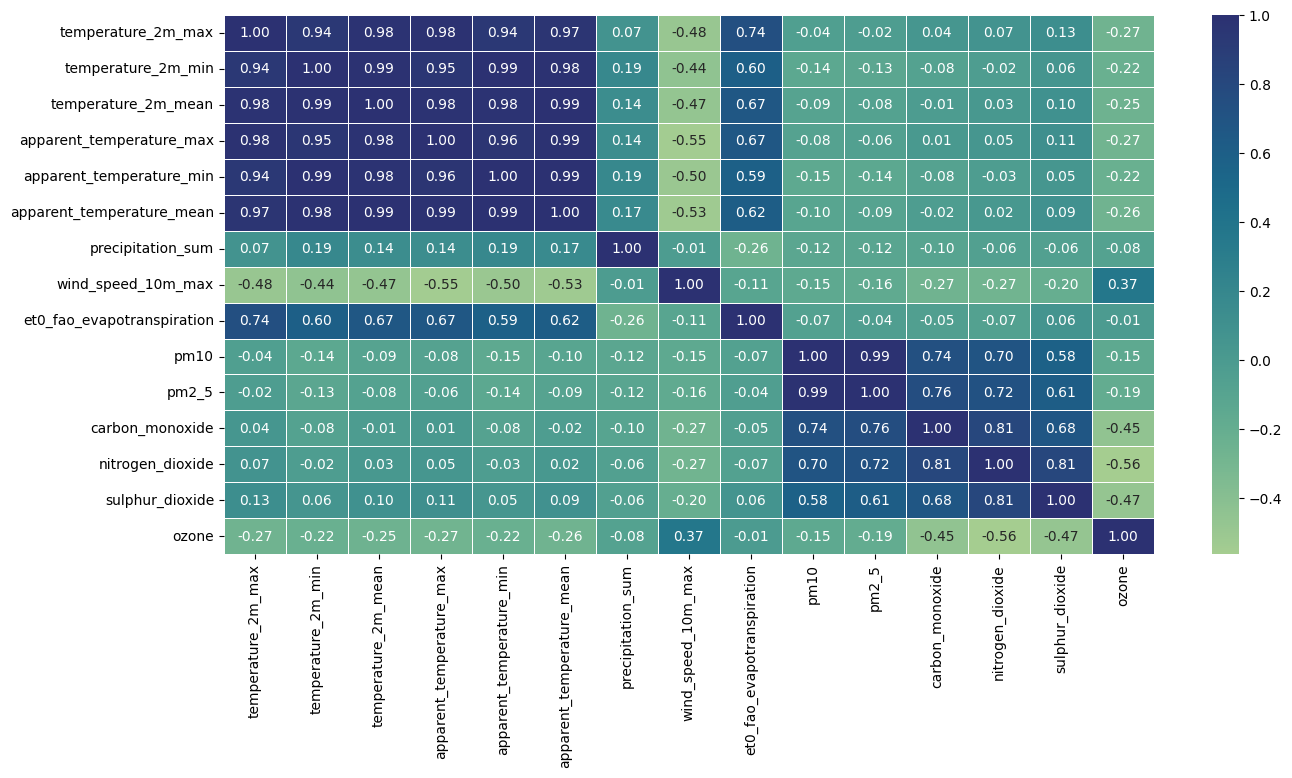

In [16]:
numerical_columns = weather_df.drop(columns=['country','city','date', 'latitude', 'longitude'])
correlation_matrix = numerical_columns.corr()
figure, axes = plt.subplots(figsize=(15,7))

axes = sns.heatmap(correlation_matrix,
                   # Adicionando valores numéricos nos quadrados do mapa de calor
                   annot=True,
                   # Especificando a largura das linhas entre os quadrados
                   linewidths=0.5,
                   # Limitando os valores a float com duas casas decimais
                   fmt='.2f',
                   # Definindo o esquema de cores
                   cmap='crest')

> - É evidente a alta correlação existente entre as medidas de temperatura, visto que são parte da mesma grandeza, além disso a temperatura média é diretamente influenciada pela mínima e máxima diária.
> - Além disso, a alta correlação entre evapotranspiração e temperatura máxima (0.74) e temperatura aparente máxima (0.67) é coerente visto que altas temperaturas aumentam a taxa de evaporação da superfície do solo e estimulam a transpiração das plantas.
> - Em termos de qualidade do ar, pode-se notar a alta correlação entre dióxido de enxofre e PM2.5 (0.61), visto que a emissão do primeiro na atmosfera contribue para formação de partículas do segundo¹.
> - Além disso, PM2.5 possui uma alta correção com PM10 (0.99), monóxido de carbono (0.76) e dióxido de nitrogenio (0.72) visto que esses elementos são provenientes de fontes comuns como a queima incompleta de combubstíveis fósseis.

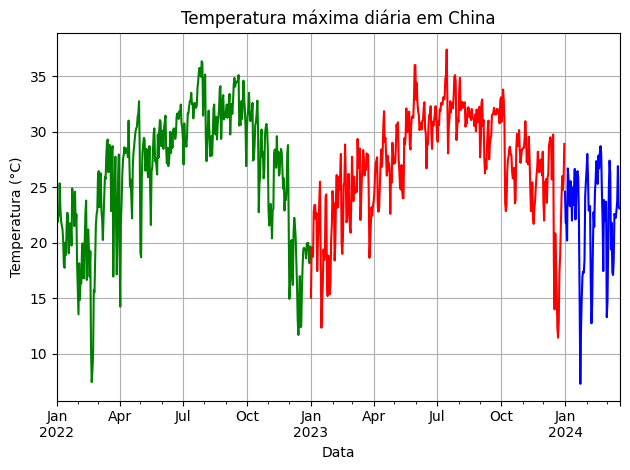

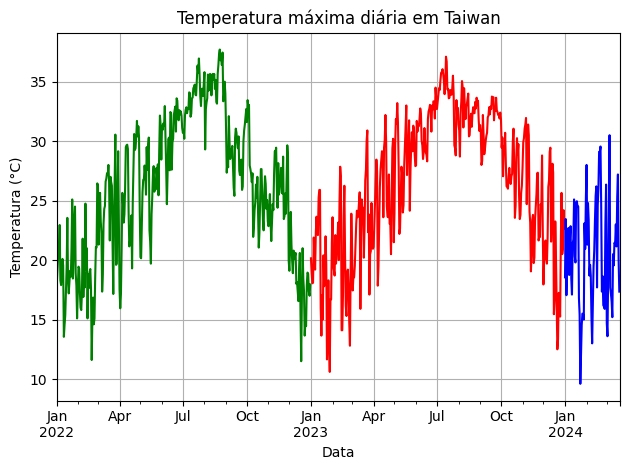

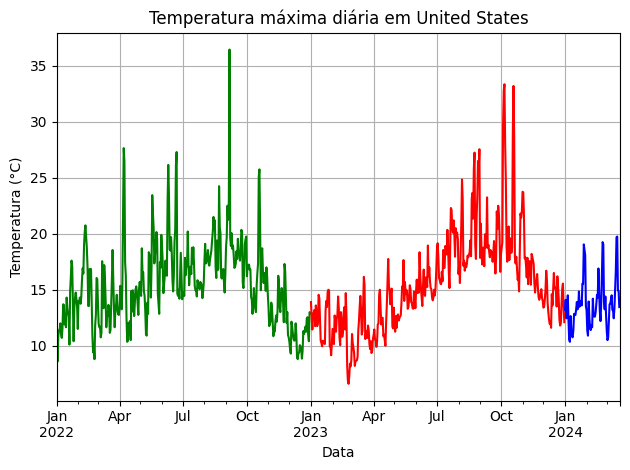

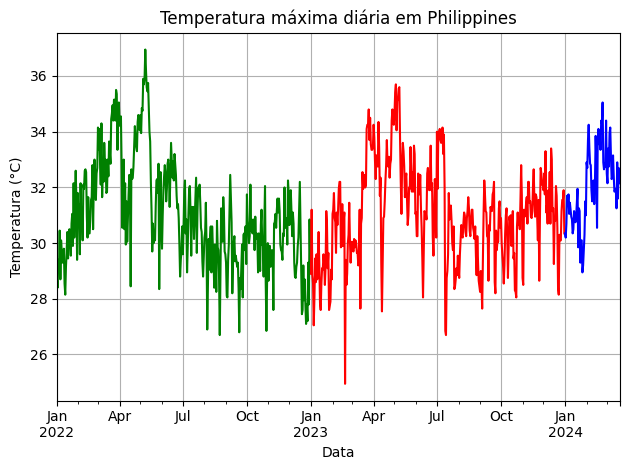

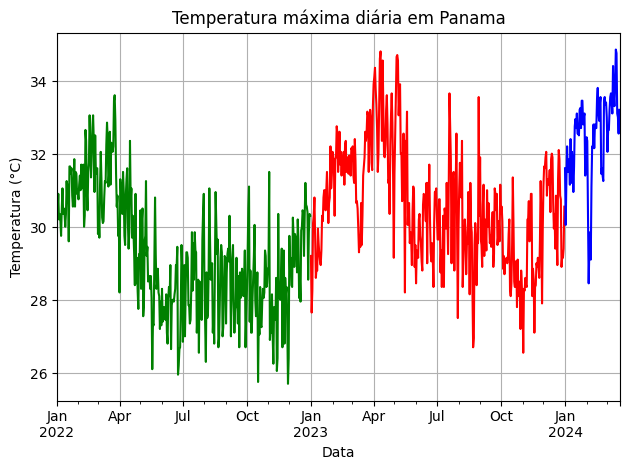

In [17]:
countries = weather_df.country.unique()

for country in countries:
    
    start_22 = pd.to_datetime('2022-01-01 00:00:00+00:00')
    end_22 = pd.to_datetime('2022-12-31 00:00:00+00:00')
    
    temperature_by_country_22 = weather_df[
        (weather_df['country'] == country) &
        (weather_df['date'] >= start_22) &
        (weather_df['date'] <= end_22) ]
    
    temperature_by_country_22.set_index('date', inplace=True)
    temperature_by_country_22['temperature_2m_max'].plot(kind='line',linestyle='-', color='green')
    # print(temperature_by_country_22)

    start_23 = pd.to_datetime('2023-01-01 00:00:00+00:00')
    end_23 = pd.to_datetime('2023-12-31 00:00:00+00:00')
    
    temperature_by_country_23 = weather_df[
        (weather_df['country'] == country) &
        (weather_df['date'] >= start_23) &
        (weather_df['date'] <= end_23) ]
    
    temperature_by_country_23.set_index('date', inplace=True)
    temperature_by_country_23['temperature_2m_max'].plot(kind='line',linestyle='-', color='red')

    start_24 = pd.to_datetime('2024-01-01 00:00:00+00:00')
    end_24 = pd.to_datetime('2024-03-20 00:00:00+00:00')

    temperature_by_country_24 = weather_df[
        (weather_df['country'] == country) &
        (weather_df['date'] >= start_24) &
        (weather_df['date'] <= end_24) ]
    
    temperature_by_country_24.set_index('date', inplace=True)
    temperature_by_country_24['temperature_2m_max'].plot(kind='line',linestyle='-', color='blue')
    
    plt.title(f"Temperatura máxima diária em {country}")
    plt.xlabel("Data")
    plt.ylabel("Temperatura (°C)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

['China' 'Taiwan' 'United States' 'Philippines' 'Panama']


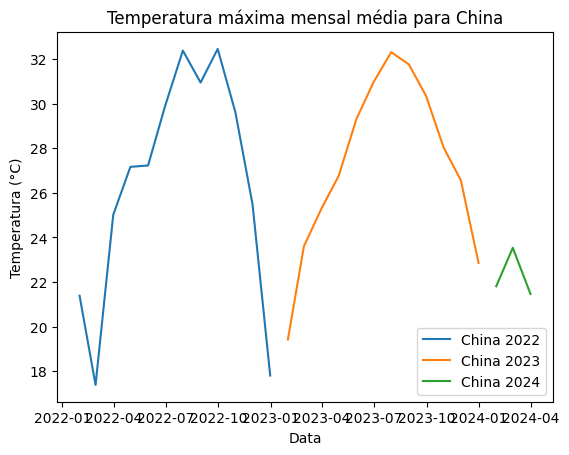

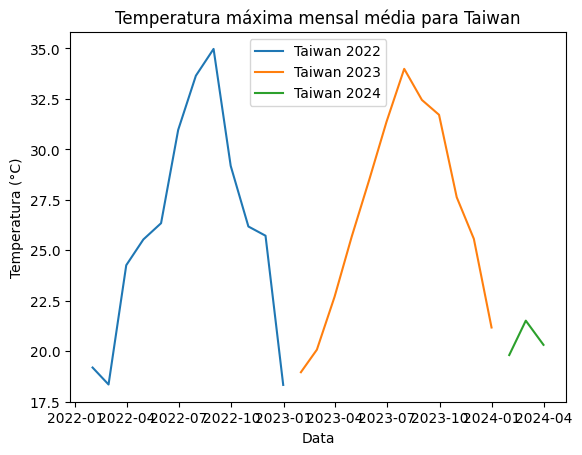

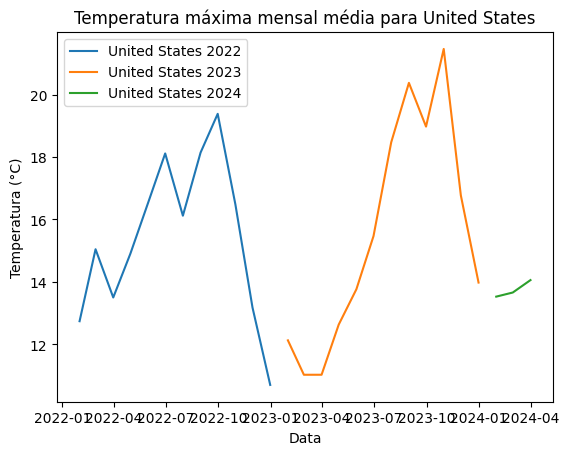

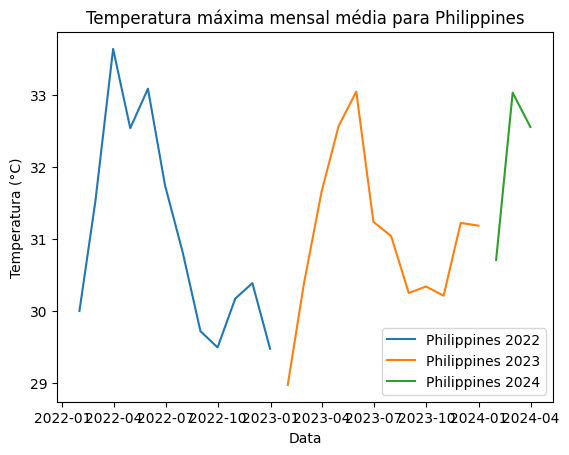

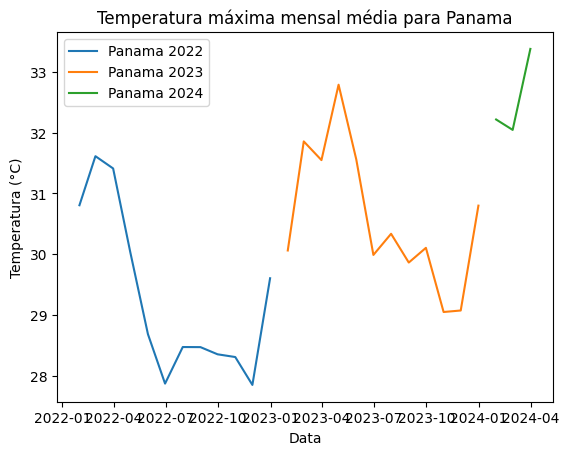

In [20]:
leap_year_data = pd.to_datetime('2024-02-29 00:00:00+00:00')
weather_df = weather_df[weather_df['date'] != leap_year_data]
countries = weather_df.country.unique()
print(countries)

meses = list(calendar.month_name)[1:]

# fig, ax = plt.subplots()

for country in countries:
    
    start_22 = pd.to_datetime('2022-01-01 00:00:00+00:00')
    end_22 = pd.to_datetime('2022-12-31 00:00:00+00:00')
    
    temperature_by_country_22 = weather_df[
        (weather_df['country'] == country) &
        (weather_df['date'] >= start_22) &
        (weather_df['date'] <= end_22) ]

    # indexed_22 = temperature_by_country_22.groupby(pd.Grouper(key='date', freq='ME')).mean(numeric_only=True)
    indexed_22 = temperature_by_country_22.set_index('date').resample('ME').mean(numeric_only=True) 
    indexed_22 = indexed_22.reindex(pd.date_range(start=start_22, end=end_22, freq='ME'), fill_value=None)
    # sns.lineplot(data=indexed_22['temperature_2m_max'], ax=ax, label=f'{country} 2022')
    sns.lineplot(data=indexed_22['temperature_2m_max'], label=f'{country} 2022')

    start_23 = pd.to_datetime('2023-01-01 00:00:00+00:00')
    end_23 = pd.to_datetime('2023-12-31 00:00:00+00:00')
    
    temperature_by_country_23 = weather_df[
        (weather_df['country'] == country) &
        (weather_df['date'] >= start_23) &
        (weather_df['date'] <= end_23) ]
    
    # indexed_23 = temperature_by_country_23.set_index('date').resample('ME').mean() 
    indexed_23 = temperature_by_country_23.groupby(pd.Grouper(key='date', freq='ME')).mean(numeric_only=True)
    indexed_23 = indexed_23.reindex(pd.date_range(start=start_23, end=end_23, freq='ME'), fill_value=None)
    # sns.lineplot(data=indexed_23['temperature_2m_max'], ax=ax, label=f'{country} 2023')
    sns.lineplot(data=indexed_23['temperature_2m_max'], label=f'{country} 2023')

    start_24 = pd.to_datetime('2024-01-01 00:00:00+00:00')
    # end_24 = pd.to_datetime('2024-03-20 00:00:00+00:00')
    end_24 = pd.to_datetime('2024-12-31 00:00:00+00:00')

    temperature_by_country_24 = weather_df[
        (weather_df['country'] == country) &
        (weather_df['date'] >= start_24) &
        (weather_df['date'] <= end_24) ]
    
    # indexed_24 = temperature_by_country_24.set_index('date').resample('ME').mean() 
    indexed_24 = temperature_by_country_24.groupby(pd.Grouper(key='date', freq='ME')).mean(numeric_only=True) 
    indexed_24 = indexed_24.reindex(pd.date_range(start=start_24, end=end_24, freq='ME'), fill_value=None)
    # sns.lineplot(data=indexed_24['temperature_2m_max'], ax=ax, label=f'{country} 2024')
    sns.lineplot(data=indexed_24['temperature_2m_max'], label=f'{country} 2024')

    plt.title(f"Temperatura máxima mensal média para {country}")
    plt.xlabel("Data")
    plt.ylabel("Temperatura (°C)")
    plt.show()

